# Exploring and annotating pre-calculated iModulons

The pymodulon.core.IcaData object is at the core of the PyModulon package. This object holds all of the data related to the expression dataset, the iModulons, and their annotations.

In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model

## Minimum Requirements

Let's explore the M and A matrices of the example data.

The IcaData object only requires two matrices, which are the results of performing Independent Component Analysis (ICA) on an expression dataset.

The iModulon matrix contains the Independent Components (ICs) themselves. Each column represents an IC, and each row contains the gene weights for each gene across each IC.

In [2]:
M = example_data.M
M.head()

,AllR/AraC/FucR,ArcA-1,ArcA-2,ArgR,AtoC,BW25113,Cbl+CysB,CdaR,CecR,Copper,...,thrA-KO,translation,uncharacterized-1,uncharacterized-2,uncharacterized-3,uncharacterized-4,uncharacterized-5,uncharacterized-6,ydcI-KO,yheO-KO
b0002,-0.010888,-0.007717,-0.008502,-0.012186,-0.061489,-0.005599,-0.007377,-0.000795,0.004331,0.001845,...,0.479209,0.035685,0.024778,-0.010660,-0.002123,-0.004416,-0.005428,-0.009219,-0.004345,-0.007838
b0003,-0.011467,0.003042,0.011448,-0.003685,-0.006106,0.006680,-0.043512,0.005107,0.000474,0.007650,...,0.011420,0.040811,0.003324,-0.008424,-0.004415,-0.016126,-0.016476,-0.003497,-0.003583,0.003381
b0004,-0.008693,0.003944,0.012347,-0.008104,0.000585,0.003245,-0.041283,0.006390,0.004260,0.007109,...,0.011339,0.036244,0.003710,-0.005212,0.000700,-0.011096,-0.006140,-0.003155,-0.008418,0.000129
b0005,0.006565,-0.001099,0.009415,-0.008507,0.005399,0.014748,-0.009249,-0.003058,-0.012649,-0.002370,...,-0.015324,0.028972,0.023969,0.000150,0.018497,0.009428,0.001255,-0.006890,-0.028069,0.021534
b0006,-0.006011,0.009889,-0.005555,-0.000152,-0.002454,0.009678,-0.003456,0.002160,-0.001924,-0.000628,...,-0.005661,0.000700,-0.002538,-0.006103,-0.002506,-0.005077,-0.004616,-0.003585,0.001607,0.001285


The Activity matrix contains the condition-specific activities. Each column represents a sample, and each row contains the activity of each iModulon across all samples.

In [3]:
A = example_data.A
A.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
AllR/AraC/FucR,0.378690,-0.378690,2.457678,2.248678,-0.327344,-0.259164,1.777251,2.690655,0.656937,0.319583,...,1.041336,2.203940,3.698292,0.856998,1.557323,0.337806,0.943742,1.736640,0.499461,1.581476
ArcA-1,-0.440210,0.440210,-5.367360,-5.684301,0.131174,0.348843,-4.436389,-4.770469,-1.799113,-1.474222,...,-6.471714,-6.549861,-3.109145,-2.716183,-2.531192,-1.461022,-0.408849,-0.210397,-5.700321,-6.237836
ArcA-2,0.762258,-0.762258,2.619623,2.900696,3.120724,2.743634,1.989803,1.555835,1.782500,1.530811,...,2.789653,3.959650,1.585147,0.811182,0.300414,2.537535,1.061408,2.634524,0.125513,1.178747
ArgR,-0.289630,0.289630,-10.085719,-13.187916,2.371129,1.861918,-8.708701,-7.881588,-1.237027,-1.235604,...,-11.263744,-10.366813,-0.289217,0.389228,-5.142768,-5.014526,-3.648777,-4.125952,-4.286326,-5.475940
AtoC,0.250770,-0.250770,1.844767,2.055052,0.299345,0.425502,1.801217,1.790987,0.921254,1.410026,...,3.821909,3.306573,2.652394,1.910173,0.927772,1.327549,1.846321,0.909667,2.064662,2.371405


To create the IcaData object, the M and A datasets can be entered as either filenames or as a Pandas DataFrame

In [4]:
ica_data = IcaData(M,A)
ica_data

Once loaded, the M and A matrices can be accessed directly from the object

In [5]:
ica_data.M.head()

,AllR/AraC/FucR,ArcA-1,ArcA-2,ArgR,AtoC,BW25113,Cbl+CysB,CdaR,CecR,Copper,...,thrA-KO,translation,uncharacterized-1,uncharacterized-2,uncharacterized-3,uncharacterized-4,uncharacterized-5,uncharacterized-6,ydcI-KO,yheO-KO
b0002,-0.010888,-0.007717,-0.008502,-0.012186,-0.061489,-0.005599,-0.007377,-0.000795,0.004331,0.001845,...,0.479209,0.035685,0.024778,-0.010660,-0.002123,-0.004416,-0.005428,-0.009219,-0.004345,-0.007838
b0003,-0.011467,0.003042,0.011448,-0.003685,-0.006106,0.006680,-0.043512,0.005107,0.000474,0.007650,...,0.011420,0.040811,0.003324,-0.008424,-0.004415,-0.016126,-0.016476,-0.003497,-0.003583,0.003381
b0004,-0.008693,0.003944,0.012347,-0.008104,0.000585,0.003245,-0.041283,0.006390,0.004260,0.007109,...,0.011339,0.036244,0.003710,-0.005212,0.000700,-0.011096,-0.006140,-0.003155,-0.008418,0.000129
b0005,0.006565,-0.001099,0.009415,-0.008507,0.005399,0.014748,-0.009249,-0.003058,-0.012649,-0.002370,...,-0.015324,0.028972,0.023969,0.000150,0.018497,0.009428,0.001255,-0.006890,-0.028069,0.021534
b0006,-0.006011,0.009889,-0.005555,-0.000152,-0.002454,0.009678,-0.003456,0.002160,-0.001924,-0.000628,...,-0.005661,0.000700,-0.002538,-0.006103,-0.002506,-0.005077,-0.004616,-0.003585,0.001607,0.001285


If the M and A datasets have row or column names, these will be saved as the sample/gene/iModulon names. Since genes are often re-named when characterized, the locus tag is the preferred identifier.

In [6]:
print('Gene names:',ica_data.gene_names[:5])
print('Sample names:',ica_data.sample_names[:5])
print('iModulon names:',ica_data.imodulon_names[:5])

Gene names: ['b0002', 'b0003', 'b0004', 'b0005', 'b0006']
Sample names: ['control__wt_glc__1', 'control__wt_glc__2', 'fur__wt_dpd__1', 'fur__wt_dpd__2', 'fur__wt_fe__1']
iModulon names: ['AllR/AraC/FucR', 'ArcA-1', 'ArcA-2', 'ArgR', 'AtoC']


## Adding the Expression Matrix

Now we can take a look at the raw data.

The X matrix contains eXpression data and is primarily used for plotting functions. The column names of the X matrix are the sample names, and the row names are the gene identifiers.

In [7]:
X = example_data.X
X.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0002,-0.061772,0.061772,0.636527,0.819793,-0.003615,-0.289353,-1.092023,-0.777289,0.161343,0.145641,...,-0.797097,-0.791859,0.080114,0.102154,0.608180,0.657673,0.813105,0.854813,0.427986,0.484338
b0003,-0.053742,0.053742,0.954439,1.334385,0.307588,0.128414,-0.872563,-0.277893,0.428542,0.391761,...,-0.309105,-0.352535,-0.155074,-0.077145,0.447030,0.439881,0.554528,0.569030,0.154905,0.294799
b0004,-0.065095,0.065095,-0.202697,0.119195,-0.264995,-0.546017,-1.918349,-1.577736,-0.474815,-0.495312,...,-0.184898,-0.225615,0.019575,0.063986,0.483343,0.452754,0.524828,0.581878,0.293239,0.341040
b0005,0.028802,-0.028802,-0.865171,-0.951179,0.428769,0.123564,-1.660351,-1.531147,0.240353,-0.151132,...,-0.308221,-0.581714,0.018820,0.004040,-1.228763,-1.451750,-0.839203,-0.529349,-0.413336,-0.478682
b0006,0.009087,-0.009087,-0.131039,-0.124079,-0.144870,-0.090152,-0.219917,-0.046648,-0.044537,-0.089204,...,1.464603,1.415706,1.230831,1.165153,0.447447,0.458852,0.421417,0.408077,1.151066,1.198529


In [8]:
ica_data.X = X

## Adding Annotation Tables

You may load in additional data tables with information about your samples, genes, or iModulons.

These tables are originally empty, but can be altered like any Pandas DataFrame.

In [9]:
ica_data.gene_table.head()

""
b0002
b0003
b0004
b0005
b0006


Annotation tables contain one sample/gene/iModulon per row, and information about the respective item in columns. 

For example, a gene_table may include the gene function, genomic position, or Cluster of Orthologous Groups (COG) Category.

Gene names must match the gene names in the M matrix.

In [10]:
gene_table = example_data.gene_table
gene_table.head()

,start,end,strand,gene_name,length,operon,COG,accession
b0001,189,255,+,thrL,66,thrLABC,No COG Annotation,NC_000913.3
b0002,336,2799,+,thrA,2463,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown,NC_000913.3


The sample_table contains detailed experimental metadata about each sample. This must be manually created, and can contain information related to the strains or experimental conditions used in the study.

The project and condition columns in the sample table will be useful for the plotting functions.

In [11]:
sample_table = example_data.sample_table
sample_table.head()

,Study,project,condition,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,ALEdb sample,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,NaN,No,NaN,MiSeq,NaN,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,NaN,No,NaN,MiSeq,NaN,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,0.00,No,NaN,MiSeq,NaN,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,0.00,No,NaN,MiSeq,NaN,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,1.06,No,NaN,MiSeq,NaN,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


The imodulon_table contains information about each iModulon, such as regulator enrichments or iModulon size.

In [12]:
imodulon_table = example_data.imodulon_table
imodulon_table.head()

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
name,,,,,,,,,,
AllR/AraC/FucR,allR/araC/fucR,0.750000,1.190000e-41,1.000000,0.600000,18.0,18,3,Carbon Source Utilization,0.086996
ArcA-1,arcA,0.130952,6.420000e-20,0.660000,0.072687,33.0,50,1,Energy Metabolism,0.058051
ArcA-2,arcA,0.087683,1.150000e-16,0.840000,0.046256,21.0,25,1,Energy Metabolism,0.081113
ArgR,argR,0.177778,6.030000e-18,0.923077,0.098361,12.0,13,1,Amino Acid and Nucleotide Biosynthesis,0.080441
AtoC,atoC,0.800000,1.520000e-12,0.666667,1.000000,4.0,6,1,Miscellaneous Metabolism,0.105756


The tables can be loaded into the IcaData object as either filenames or as a Pandas DataFrame

In [13]:
ica_data.gene_table = gene_table
ica_data.sample_table = sample_table
ica_data.imodulon_table = imodulon_table

In [14]:
ica_data.sample_table.head()

,Study,project,condition,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,ALEdb sample,Additional Details,Biological Replicates,Alignment,DOI,GEO
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,NaN,No,NaN,MiSeq,NaN,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,NaN,No,NaN,MiSeq,NaN,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,0.00,No,NaN,MiSeq,NaN,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,0.00,No,NaN,MiSeq,NaN,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,1.06,No,NaN,MiSeq,NaN,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


In [15]:
ica_data.gene_table.head()

,start,end,strand,gene_name,length,operon,COG,accession
b0002,336,2799,+,thrA,2463,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism,NC_000913.3
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown,NC_000913.3
b0006,5682,6459,-,yaaA,777,yaaA,Function unknown,NC_000913.3


In [16]:
ica_data.imodulon_table.head()

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
AllR/AraC/FucR,allR/araC/fucR,0.750000,1.190000e-41,1.000000,0.600000,18.0,18,3,Carbon Source Utilization,0.086996
ArcA-1,arcA,0.130952,6.420000e-20,0.660000,0.072687,33.0,50,1,Energy Metabolism,0.058051
ArcA-2,arcA,0.087683,1.150000e-16,0.840000,0.046256,21.0,25,1,Energy Metabolism,0.081113
ArgR,argR,0.177778,6.030000e-18,0.923077,0.098361,12.0,13,1,Amino Acid and Nucleotide Biosynthesis,0.080441
AtoC,atoC,0.800000,1.520000e-12,0.666667,1.000000,4.0,6,1,Miscellaneous Metabolism,0.105756


## Converting between gene names and locus tags

In [17]:
ica_data.num2name('b0002')

'thrA'

In [18]:
ica_data.name2num('thrA')

'b0002'

## Inspecting iModulons

view_imodulon shows the information about each gene in the iModulon. Most information is retrieved from the gene_table, but the regulator column comes from the trn.

In [19]:
ica_data.view_imodulon('GlpR')

,gene_weight,start,end,strand,gene_name,length,operon,COG,accession
b2239,0.211384,2349934,2351011,-,glpQ,1077,glpTQ,Energy production and conversion,NC_000913.3
b2240,0.306134,2351015,2352374,-,glpT,1359,glpTQ,Carbohydrate transport and metabolism,NC_000913.3
b2241,0.375662,2352646,2354275,+,glpA,1629,glpABC,Energy production and conversion,NC_000913.3
b2242,0.328961,2354264,2355524,+,glpB,1260,glpABC,Amino acid transport and metabolism,NC_000913.3
b2243,0.315752,2355520,2356711,+,glpC,1191,glpABC,Energy production and conversion,NC_000913.3
b3426,0.350034,3562012,3563518,+,glpD,1506,glpD,Energy production and conversion,NC_000913.3
b3926,0.290235,4115713,4117222,-,glpK,1509,glpFKX,Energy production and conversion,NC_000913.3
b3927,0.312307,4117244,4118090,-,glpF,846,glpFKX,Carbohydrate transport and metabolism,NC_000913.3


## Searching for genes in iModulons

To find which iModulons contain a specific gene, use the imodulons_with method.

In [20]:
ica_data.imodulons_with('b2239')

['GlpR']

If the gene_table contains a gene_name columns, this function will work with either the locus tag or the gene name.

In [21]:
ica_data.imodulons_with('carA')

['PurR-2']

## Working with the TRN

Adding the transcriptional regulatory network (TRN) to the IcaData object enables automated calculation of regulon enrichments. Each row of the TRN file represents a regulatory interaction. The TRN must contain the following columns:

-regulator: Name of the regulator (/ or + characters will be converted to ;)

-gene_id: Locus tag of the target gene (must be in ica_data.gene_names)



The following columns are optional, but are helpful to have:

-regulator_id - Locus tag of regulator

-gene_name - Name of gene (can automatically update this using name2num)

-direction - Direction of regulation (+ for activation, - for repression, ? or NaN for unknown)

-evidence - Evidence of regulation (e.g. ChIP-exo, qRT-PCR, SELEX, Motif search)

-PMID - Reference for regulatory interaction

In [22]:
trn = example_data.trn
trn.head()

,regulator,gene_id,effect
0,FMN,b3041,-
1,L-tryptophan,b3708,+
2,L-tryptophan,b3709,+
3,TPP,b0066,-
4,TPP,b0067,-


Again, this table can be passed in as either a filename or a Pandas DataFrame.

In [23]:
ica_data.trn = trn
ica_data.trn.head()

,regulator,gene_id,effect
0,FMN,b3041,-
1,L-tryptophan,b3708,+
2,L-tryptophan,b3709,+
3,TPP,b0066,-
4,TPP,b0067,-


## Gene Enrichment Analysis

### General Enrichment Functions

To perform a basic enrichment test between two gene sets, use the ``compute_enrichment`` function.
Optional arguments:

* ``label``: Label for your target gene set (e.g. regulator name or GO term)

In [24]:
from pymodulon.enrichment import *

In [25]:
gene_set = ['b0002','b0003','b0004'] # e.g. an iModulon or other gene set
target_genes = ['b0002','b0005','b0007'] # e.g. a regulon or genes in a COG category
all_genes = ica_data.gene_names # List of all genes in your expression dataset

In [26]:
compute_enrichment(gene_set,target_genes,all_genes)

pvalue             0.002293
precision          0.333333
recall             0.333333
f1score            0.333333
TP                 1.000000
target_set_size    3.000000
gene_set_size      3.000000
dtype: float64

To perform an enrichment test against a regulon in a TRN table, use the ``compute_regulon`` function.

In [27]:
compute_regulon_enrichment(gene_set,'lrp',all_genes,trn) 

pvalue             0.000131
precision          1.000000
recall             0.015000
f1score            0.029557
TP                 3.000000
regulon_size     200.000000
gene_set_size      3.000000
n_regs             1.000000
Name: lrp, dtype: float64

To perform an enrichment against all regulons in a TRN table, use the ``compute_trn_enrichment`` function. This function includes false detection correction using the Benjamini-Hochberg procedure to compute [Q-values](https://en.wikipedia.org/wiki/Q-value_(statistics)). By default, the false detection rate is ``1e-5``, and can be updated using the ``fdr`` argument.

In [28]:
compute_trn_enrichment(gene_set,all_genes,trn)

,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,n_regs,qvalue
thr-tRNA,0.000000e+00,1.0,1.000000,1.000000,3.0,3.0,3.0,1.0,0.000000e+00
ile-tRNA,8.354256e-09,1.0,0.333333,0.500000,3.0,9.0,3.0,1.0,2.923990e-08
lrp,1.306248e-04,1.0,0.015000,0.029557,3.0,200.0,3.0,1.0,3.047911e-04
arcA,1.540883e-03,1.0,0.006608,0.013129,3.0,454.0,3.0,1.0,2.157237e-03
fnr,1.411995e-03,1.0,0.006803,0.013514,3.0,441.0,3.0,1.0,2.157237e-03
crp,3.335561e-03,1.0,0.005111,0.010169,3.0,587.0,3.0,1.0,3.891487e-03


``compute_trn_enrichment`` can perform enrichment against complex regulons in boolean combinations. The ``max_regs`` argument determines the number of regulators to include in the complex regulon, and the ``method`` argument determines how to combine complex regulons. ``method='or'`` computes enrichments against the union of regulons, ``'and'`` computes enrichment against intersection of regulons, and ``'both'`` performs both tests (default).

In [29]:
compute_trn_enrichment(gene_set,all_genes,trn,max_regs=2).head()

,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,n_regs,qvalue
fnr+ile-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,0.0
thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,0.0
arcA+ile-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,0.0
lrp+thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,0.0
arcA+thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,0.0


Increasing the number of regulators for complex regulons beyond three can lead to a combinatorial explosion. If you are sure you want to search for larger complex regulons, use ``force=True``

In [30]:
compute_trn_enrichment(gene_set,all_genes,trn,max_regs=3,force=True).head()

,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,n_regs,qvalue
arcA+ile-tRNA+lrp,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0
arcA+ile-tRNA+thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0
arcA+lrp+thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0
arcA+rpoD+thr-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0
crp+fnr+ile-tRNA,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0


### Enrichments with the IcaData object

In [31]:
# Compare a single iModulon to a simple regulon
ica_data.compute_regulon_enrichment('GlpR',regulator='glpR')

pvalue           6.515058e-24
precision        1.000000e+00
recall           8.888889e-01
f1score          9.411765e-01
TP               8.000000e+00
regulon_size     9.000000e+00
imodulon_size    8.000000e+00
n_regs           1.000000e+00
Name: glpR, dtype: float64

In [32]:
# Compare a single iModulon to a complex regulon
ica_data.compute_regulon_enrichment('Copper','cusR/cueR')

pvalue           3.933564e-10
precision        1.000000e+00
recall           2.105263e-01
f1score          3.478261e-01
TP               4.000000e+00
regulon_size     1.900000e+01
imodulon_size    4.000000e+00
n_regs           2.000000e+00
Name: cusR/cueR, dtype: float64

In [33]:
# Get all significant enrichments for all iModulons. 
# Optional parameters are same as the global compute_trn_enrichment function
ica_data.compute_trn_enrichment()

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,AllR/AraC/FucR,allR,3.488522e-15,2.790817e-14,0.600000,0.666667,0.631579,6.0,9.0,10.0,1.0
1,AllR/AraC/FucR,araC,2.107315e-08,8.429259e-08,0.400000,0.285714,0.333333,4.0,14.0,10.0,1.0
2,ArcA-1,arcA,7.428452e-23,3.639941e-21,0.578947,0.096916,0.166038,44.0,454.0,76.0,1.0
3,ArcA-1,crp,2.267518e-12,5.555419e-11,0.486842,0.063032,0.111614,37.0,587.0,76.0,1.0
4,ArcA-2,appY,1.685325e-15,7.583963e-14,0.173913,0.888889,0.290909,8.0,9.0,46.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
185,proVWX,betI,9.274727e-09,3.153407e-07,0.100000,1.000000,0.181818,4.0,4.0,40.0,1.0
186,translation,rpoD,1.522323e-11,8.372775e-10,0.664000,0.056966,0.104930,83.0,1457.0,125.0,1.0
187,translation,fnr,4.717988e-11,1.297447e-09,0.328000,0.092971,0.144876,41.0,441.0,125.0,1.0
188,translation,arcA,2.437396e-08,4.468559e-07,0.296000,0.081498,0.127807,37.0,454.0,125.0,1.0


## Renaming iModulons

Individual iModulons can be renamed using the rename_imodulons method

In [34]:
print('Original iModulon Names:', ica_data.imodulon_names[:5])
ica_data.rename_imodulons({'AllR/AraC/FucR':'AllR'})
print('Renamed iModulon Names:', ica_data.imodulon_names[:5])

Original iModulon Names: ['AllR/AraC/FucR', 'ArcA-1', 'ArcA-2', 'ArgR', 'AtoC']
Renamed iModulon Names: ['AllR', 'ArcA-1', 'ArcA-2', 'ArgR', 'AtoC']


These changes are reflected throughout the IcaData object.

## Visualization

In [35]:
from pymodulon.plotting import *
from pymodulon.example_data import load_ecoli_data

In [36]:
ica_data = load_ecoli_data()

Gene expression and iModulon activities are easily viewed as bar plots. Use the plot_expression and plot_activities functions, respectively. Any numeric metadata for your experiments can be plotted using the plot_metadata function.

Optional arguments:

-projects: Only show specific project(s)

-highlight: Show individiual conditions for specific project(s)

-ax: Use a pre-existing matplotlib axis (helpful if you want to manually determine the plot size).

-legend_args: Dictionary of arguments to pass to the matplotlib legend (e.g. {'fontsize':12, 'loc':0, 'ncol':2})

## Plotting Gene Expression

You can plot the compendium-wide expression of a gene using either the locus tag or gene name. Each bar represents an experimental condition, and points are overlaid on the bars to show the gene expression of individual replicates. The plot is subdivided into projects, as stored in the sample_table.

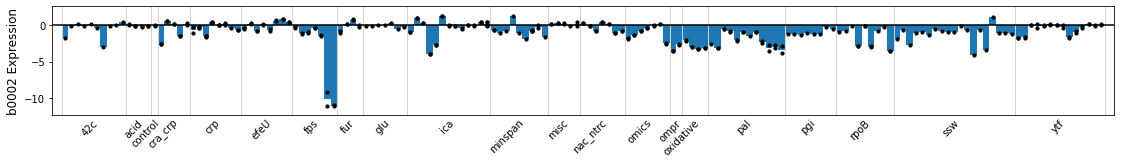

In [37]:
plot_expression(ica_data,'b0002');

The plot can be limited to specific projects using the projects argument. The highlight argument shows individual conditions in the legend.

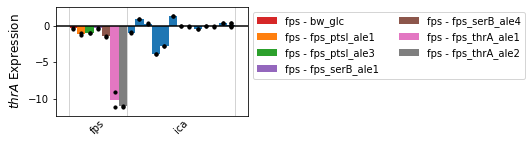

In [38]:
plot_expression(ica_data,'thrA',projects=['ica','fps'],highlight='fps');

## Plotting iModulon Activity

The plot_activities function mirrors the plot_expression function, but shows iModulon activities instead of gene expression.

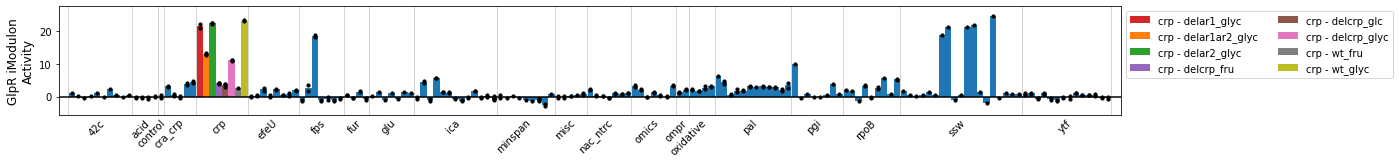

In [39]:
plot_activities(ica_data,'GlpR',highlight='crp');

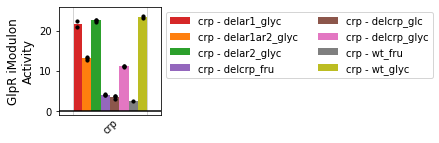

In [40]:
plot_activities(ica_data,'GlpR',projects='crp');

## Plotting Metadata

If the sample_table contains numerical values in a column, this column can be graphed using the plot_metadata function.

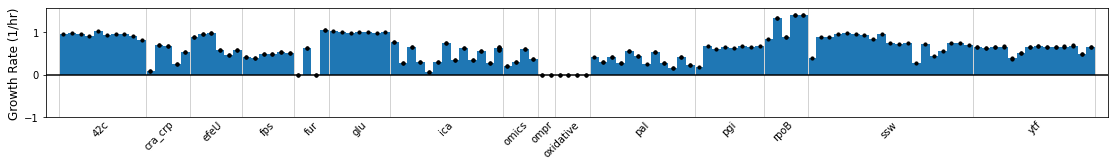

In [41]:
plot_metadata(ica_data,'Growth Rate (1/hr)');

## Metadata Boxplots

The function metadata_boxplot uses a decision tree regressor to automatically cluster iModulon activities using metadata. Displays results as a box plot.

<AxesSubplot:xlabel='GlpR'>

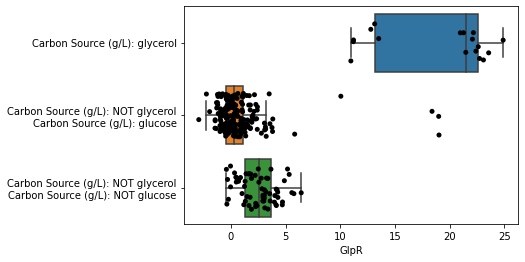

In [42]:
metadata_boxplot(ica_data, 'GlpR')

## Scatterplots

Gene expression and iModulon activities can be compared with a scatter plot. Use the compare_expression and compare_activities functions, respectively. In addition, compare_values can be used to compare any compendium-wide value against another, including gene expression, iModulon activity, and sample metadata.

Optional arguments:

-groups: Mapping of samples to specific groups

-colors: Color of points, list of colors to use for different groups, or dictionary mapping groups to colors

-show_labels: Show labels for points. (default: False)

-adjust_labels: Automatically avoid label overlap

-fit_metric: Correlation metric of 'pearson','spearman', or 'r2adj' (default: 'pearson')

-ax: Use a pre-existing axis (helpful if you want to manually determine the plot size)

Formatting arguments:

-ax_font_args: Arguments for x-axis labels and y-axis labels (e.g. {'fontsize':16'})

-scatter_args: Arguments for matplotlib scatterplot (e.g. {'s'=10})

-label_font_args: Arguments for matplotlib text labels (e.g. {'fontsize':8})

-legend_args: Arguments to pass to the matplotlib legend (e.g. {'fontsize':12, 'loc':0, 'ncol':2})

## Plot Gene Weights

plot_gene_weights will plot an iModulon’s gene weights against its genomic position. If the number of genes in the iModulon is fewer than 20, it will also show the gene names (or locus tags, if gene name is unavailable). If the gene_table contains a COG column, genes will be colored by their Cluster of Orthologous Genes category.

<AxesSubplot:xlabel='Gene Start', ylabel='GlpR Gene Weight'>

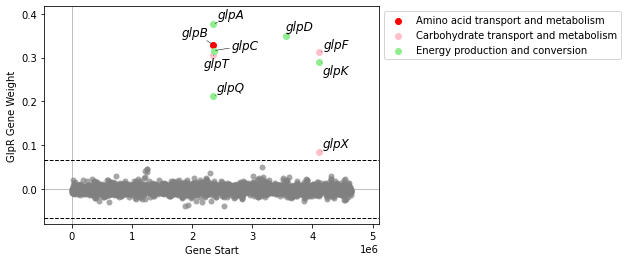

In [43]:
plot_gene_weights(ica_data,'GlpR')

If there are more than 20 genes, gene names will not be shown by default.

<AxesSubplot:xlabel='Gene Start', ylabel='Fnr Gene Weight'>

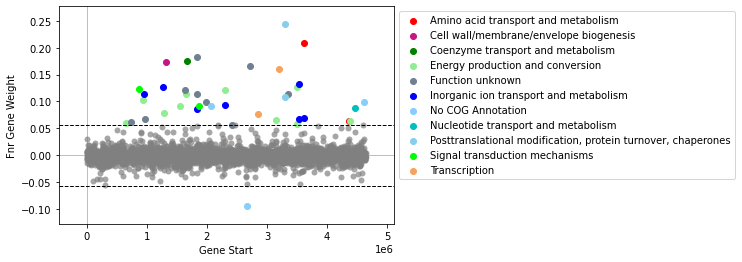

In [44]:
plot_gene_weights(ica_data,'Fnr')

Use show_labels=True show gene labels. It is advisable to turn off auto-adjustment of gene labels (adjust_labels=False), as this may take a while with many genes.

<AxesSubplot:xlabel='Gene Start', ylabel='Fnr Gene Weight'>

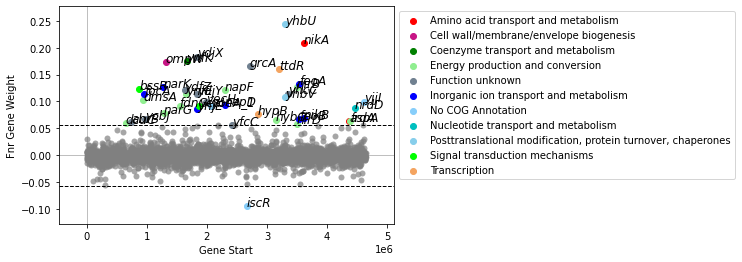

In [45]:
plot_gene_weights(ica_data,'Fnr',show_labels=True,adjust_labels=False)

## Comparing Two Expression Profiles

The compare_expression function plots two gene expression profiles against each other. Groups of samples can be highlighted to visualize the effects of experimental conditions.

In [46]:
groups = {'minspan__wt_glc_anaero__1':'Anaerobic',
          'minspan__wt_glc_anaero__2':'Anaerobic'}

<AxesSubplot:xlabel='$arcA$ Expression', ylabel='$fnr$ Expression'>

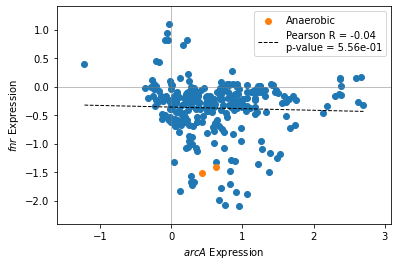

In [47]:
compare_expression(ica_data,'arcA','fnr',groups=groups)

The compare activites function mirros the compare expression function.

<AxesSubplot:xlabel='Fnr iModulon Activity', ylabel='ArcA-1 iModulon Activity'>

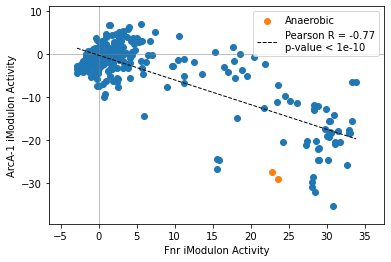

In [48]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups)

<AxesSubplot:xlabel='Fnr iModulon Activity', ylabel='ArcA-1 iModulon Activity'>

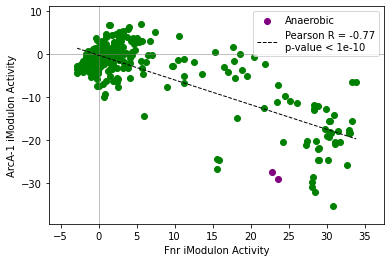

In [49]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups,colors=['green','purple'])

## Compare iModulon Gene Weights

compare_gene_weights plots the gene weights of two iModulons against each other. Dashed lines indicate iModulon thresholds. Genes outside both thresholds are highlighted in red and labelled.

<AxesSubplot:xlabel='CysB Gene Weight', ylabel='Cbl+CysB Gene Weight'>

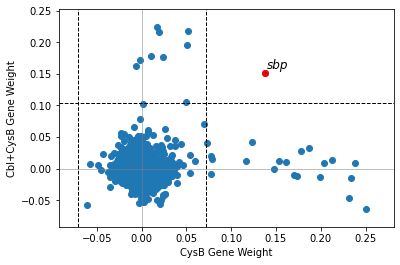

In [50]:
compare_gene_weights(ica_data,'CysB','Cbl+CysB')

## Differential iModulon Activity

A Differential iModulon Activity plot, or DiMA plot shows iModulons that have significantly different iModulon activities between two experimental conditions. The plot_dima function can either compare two conditions using project:condition keys, or using a list of sample names.

<AxesSubplot:xlabel='fur:wt_fe', ylabel='fur:delfur_fe2'>

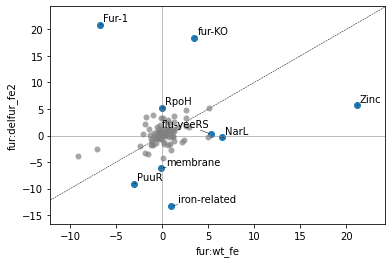

In [51]:
plot_dima(ica_data,'fur:wt_fe','fur:delfur_fe2')

To show the DiMA table, use table=True
Adjusting labels can be turned off using adjust=False

,difference,pvalue,qvalue,0,1
Fur-1,27.598965,7.320594e-04,0.011225,-6.701019,20.897946
fur-KO,14.918007,4.338664e-08,0.000004,3.516092,18.434098
RpoH,5.145175,3.091958e-03,0.031607,0.008680,5.153855
flu-yeeRS,-5.020887,2.246638e-04,0.006612,5.299051,0.278164
membrane,-6.005727,5.390713e-05,0.002480,-0.163181,-6.168908
PuuR,-6.026142,1.397577e-03,0.017874,-3.040374,-9.066517
NarL,-6.873706,4.898118e-03,0.040966,6.520503,-0.353203
iron-related,-14.209552,2.874857e-04,0.006612,1.004311,-13.205241
Zinc,-15.497242,5.238034e-04,0.009638,21.181402,5.684160


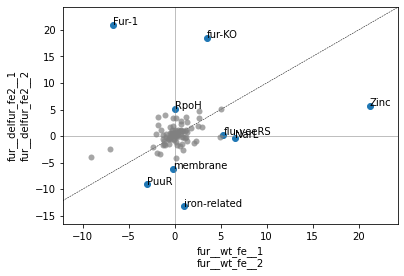

In [52]:
ax, table = plot_dima(ica_data,
          ['fur__wt_fe__1','fur__wt_fe__2'],
          ['fur__delfur_fe2__1','fur__delfur_fe2__2'],
          table=True,
          adjust=False)
table

## Overview plots
**PyModulon** contains two plots to help gain a general overview of your IcaData object.

### Compare iModulons vs Regulons
``compare_imodulon_vs_regulon`` creates a scatter plot that compares the overlap between iModulons and their linked regulators. The dashed lines creates four quadrants:

1. Top-right: iModulons that are nearly identical to known regulons ("Well-matched")
2. Top-left: iModulons contain a subset of the total genes thought to be regulated by the linked regulator ("Subset")
3. Bottom-right: iModulons contain most of the genes thought to be regulated by the linked regulator. However, these iModulons contain a high fraction of genes that are not yet confirmed to be regulated by the regulator ("Unknown-containing").
4. Bottom-left: iModulons have a small, but statistically significant, overlap with the associated regulator ("Closest match")

Additional options include:

* ``imodulons``: List of iModulons to plot
* ``cat_column``: Column in the ``imodulon_table` that stores the category of each iModulon
* ``size_column``: Column in the ``imodulon_table`` that stores the size of each iModulon
* ``scale``: Value used to scale the size of each point
* ``reg_only``: Only plot iModulons with an entry in the ``regulator`` column of the ``imodulon_table``
* ``xlabel``: Custom x-axis label (default: "# shared genes/Regulon size")
* ``ylabel``: Custom y-axis label (default: "# shared genes/iModulon size")
* ``vline``: Draw a dashed vertical line
* ``hline``: Draw a dashed horizontal line

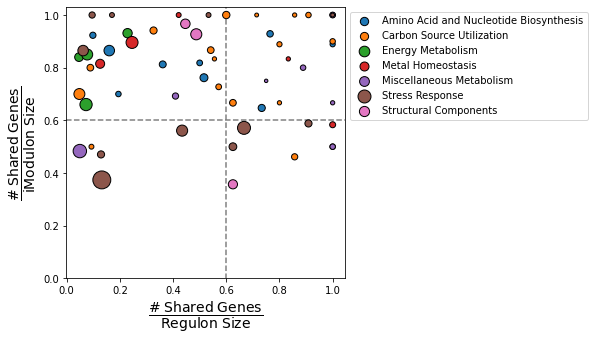

In [53]:
compare_imodulons_vs_regulons(ica_data, 
                              size_column='n_genes',
                              cat_column='Category',
                              scale=3);

## Activity Clustering

The iModulon activites in the ``A`` matrix can be clustered based on correlation between their activities across conditions in the compendium.

Use the ``cluster_activities`` function to prepare a [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html); the minimal input is simply your ``IcaData`` object.

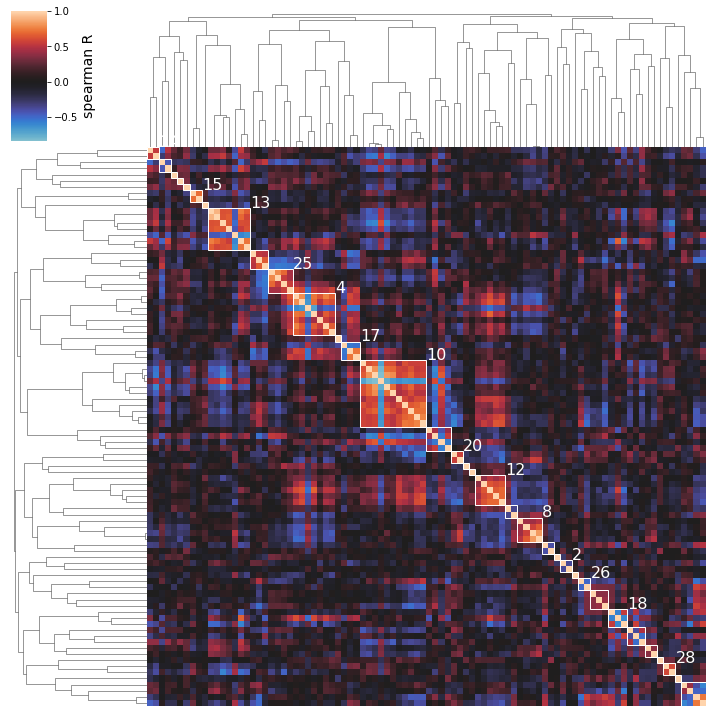

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

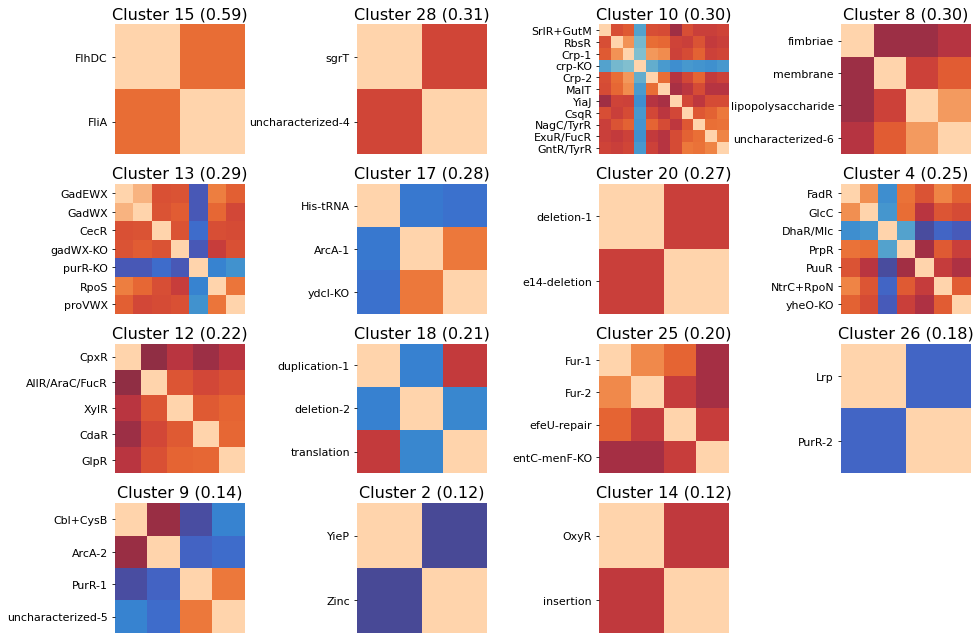

In [54]:
cluster_activities(ica_data, show_best_clusters = True)

# Saving and Loading IcaData Objects

To facilitate data sharing, you can save IcaData objects as json files that can be easily re-loaded

In [55]:
from pymodulon.io import *

In [56]:
save_to_json(ica_data,'ecoli_data.json')

In [57]:
ica_data2 = load_json_model('ecoli_data.json')

In [58]:
ica_data2.imodulon_table.head()

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
AllR/AraC/FucR,allR/araC/fucR,0.750000,1.190000e-41,1.000000,0.600000,18.0,18,3,Carbon Source Utilization,0.086996
ArcA-1,arcA,0.130952,6.420000e-20,0.660000,0.072687,33.0,50,1,Energy Metabolism,0.058051
ArcA-2,arcA,0.087683,1.150000e-16,0.840000,0.046256,21.0,25,1,Energy Metabolism,0.081113
ArgR,argR,0.177778,6.030000e-18,0.923077,0.098361,12.0,13,1,Amino Acid and Nucleotide Biosynthesis,0.080441
AtoC,atoC,0.800000,0.000000e+00,0.666667,1.000000,4.0,6,1,Miscellaneous Metabolism,0.105756


# Check out the [Readthedocs](https://pymodulon.readthedocs.io/en/latest/index.html) for more!